In [1]:
import pandas as pd

df = pd.DataFrame(columns=[
    "audio_filepath", 
    "reader_id", "book_id", 
    "audio_quality", "split", 
    "text_no_preprocessing", "text_normalized", "text", 
    "duration", "bandwidth"
])

In [13]:
bw_df = pd.read_csv("books_bandwidth.tsv", sep='\t')
bw_df = bw_df[["BOOK_ID", "BANDWIDTH", "COMMENT"]]
bw_df.columns = "book_id", "bandwidth", "comment"
bw_df.head()

,book_id,bandwidth,comment
0,6973,17657,NaN
1,7967,17140,NaN
2,9288,17312,NaN
3,9783,16709,NaN
4,10425,17915,NaN


In [3]:
reader_list = [
    '92_clean', '6097_clean', '9017_clean', 
    
    '6097_other', '6670_other', '6671_other',
    '8051_other', '9136_other', '11614_other',
    '11697_other', '12787_other'
]

In [5]:
import json
import os
from tqdm.auto import tqdm

for r in reader_list:
    rid, aq = r.split('_')
    print(r)

    for split in ("train", "test", "dev"):
        jfname = f"{rid}_manifest_{aq}_{split}.json"

        this_df = pd.DataFrame(columns=[
            "audio_filepath", 
            "reader_id", "book_id", 
            "audio_quality", "split", 
            "text_no_preprocessing", "text_normalized", "text", 
            "duration", "bandwidth"
        ])

        if not os.path.exists(jfname):
            continue

        print(jfname)
        with open(jfname, 'r') as j:
            lines = j.readlines()
            lnum = len(lines)
            for line in tqdm(lines, total=lnum):
                line = line.strip()
                row = json.loads(line)
                row["reader_id"] = rid
                row["book_id"] = row["audio_filepath"].split('/')[2]
                row["audio_quality"] = aq
                row["split"] = split
                row["bandwidth"] = bw_df.loc[bw_df["book_id"]==int(row["book_id"]), "bandwidth"].values[0]

                this_df = this_df.append(pd.DataFrame([row]))
        
        df = df.append(this_df)

df.head()

92_clean
92_manifest_clean_train.json


  0%|          | 0/35146 [00:00<?, ?it/s]

92_manifest_clean_test.json


  0%|          | 0/100 [00:00<?, ?it/s]

92_manifest_clean_dev.json


  0%|          | 0/50 [00:00<?, ?it/s]

6097_clean
6097_manifest_clean_train.json


  0%|          | 0/39373 [00:00<?, ?it/s]

6097_manifest_clean_test.json


  0%|          | 0/100 [00:00<?, ?it/s]

6097_manifest_clean_dev.json


  0%|          | 0/50 [00:00<?, ?it/s]

9017_clean
9017_manifest_clean_train.json


  0%|          | 0/51470 [00:00<?, ?it/s]

9017_manifest_clean_test.json


  0%|          | 0/100 [00:00<?, ?it/s]

9017_manifest_clean_dev.json


  0%|          | 0/50 [00:00<?, ?it/s]

6097_other
6097_manifest_other_train.json


  0%|          | 0/4200 [00:00<?, ?it/s]

6670_other
6670_manifest_other_train.json


  0%|          | 0/21240 [00:00<?, ?it/s]

6670_manifest_other_test.json


  0%|          | 0/100 [00:00<?, ?it/s]

6670_manifest_other_dev.json


  0%|          | 0/50 [00:00<?, ?it/s]

6671_other
6671_manifest_other_train.json


  0%|          | 0/27072 [00:00<?, ?it/s]

6671_manifest_other_test.json


  0%|          | 0/100 [00:00<?, ?it/s]

6671_manifest_other_dev.json


  0%|          | 0/50 [00:00<?, ?it/s]

8051_other
8051_manifest_other_train.json


  0%|          | 0/32937 [00:00<?, ?it/s]

8051_manifest_other_test.json


  0%|          | 0/100 [00:00<?, ?it/s]

8051_manifest_other_dev.json


  0%|          | 0/50 [00:00<?, ?it/s]

9136_other
9136_manifest_other_train.json


  0%|          | 0/28290 [00:00<?, ?it/s]

9136_manifest_other_test.json


  0%|          | 0/100 [00:00<?, ?it/s]

9136_manifest_other_dev.json


  0%|          | 0/50 [00:00<?, ?it/s]

11614_other
11614_manifest_other_train.json


  0%|          | 0/29962 [00:00<?, ?it/s]

11614_manifest_other_test.json


  0%|          | 0/100 [00:00<?, ?it/s]

11614_manifest_other_dev.json


  0%|          | 0/50 [00:00<?, ?it/s]

11697_other
11697_manifest_other_train.json


  0%|          | 0/21214 [00:00<?, ?it/s]

11697_manifest_other_test.json


  0%|          | 0/100 [00:00<?, ?it/s]

11697_manifest_other_dev.json


  0%|          | 0/50 [00:00<?, ?it/s]

12787_other
12787_manifest_other_train.json


  0%|          | 0/31574 [00:00<?, ?it/s]

12787_manifest_other_test.json


  0%|          | 0/100 [00:00<?, ?it/s]

12787_manifest_other_dev.json


  0%|          | 0/50 [00:00<?, ?it/s]

,audio_filepath,reader_id,book_id,audio_quality,split,text_no_preprocessing,text_normalized,text,duration,bandwidth
0,audio/92_clean/10425/secretagent_01_conrad_000...,92,10425,clean,train,"going out in the morning,","going out in the morning,",going out in the morning,1.53,17915
0,audio/92_clean/10425/secretagent_01_conrad_000...,92,10425,clean,train,left his shop nominally in charge of his broth...,left his shop nominally in charge of his broth...,left his shop nominally in charge of his broth...,3.30,17915
0,audio/92_clean/10425/secretagent_01_conrad_000...,92,10425,clean,train,because there was very little business at any ...,because there was very little business at any ...,because there was very little business at any ...,2.47,17915
0,audio/92_clean/10425/secretagent_01_conrad_000...,92,10425,clean,train,and practically none at all before the evening.,and practically none at all before the evening.,and practically none at all before the evening,2.72,17915
0,audio/92_clean/10425/secretagent_01_conrad_000...,92,10425,clean,train,Mr Verloc cared but little about his ostensibl...,Mister Verloc cared but little about his osten...,mister verloc cared but little about his osten...,3.70,17915


In [36]:
len(df), df.audio_filepath.nunique()

(323978, 323978)

In [9]:
for r in reader_list:
    rid, aq = r.split('_')
    for split in ("train", "test", "dev"):
        num = len(df[(df.reader_id==rid)&(df.audio_quality==aq)&(df.split==split)])
        if num:
            print(rid, aq, split, ':', num)
    print()

92 clean train : 35146
92 clean test : 100
92 clean dev : 50

6097 clean train : 39373
6097 clean test : 100
6097 clean dev : 50

9017 clean train : 51470
9017 clean test : 100
9017 clean dev : 50

6097 other train : 4200

6670 other train : 21240
6670 other test : 100
6670 other dev : 50

6671 other train : 27072
6671 other test : 100
6671 other dev : 50

8051 other train : 32937
8051 other test : 100
8051 other dev : 50

9136 other train : 28290
9136 other test : 100
9136 other dev : 50

11614 other train : 29962
11614 other test : 100
11614 other dev : 50

11697 other train : 21214
11697 other test : 100
11697 other dev : 50

12787 other train : 31574
12787 other test : 100
12787 other dev : 50



In [11]:
len(df), len(df[df.bandwidth>=16000]), df.book_id.nunique(), df[df.bandwidth>=16000].book_id.nunique()

(323978, 202285, 77, 42)

In [19]:
not_artistic_book = [ str(i) for i in bw_df[bw_df.comment.isna()].book_id.unique() ]
len(df), len(df[(df.bandwidth>=16000)&(df.book_id.isin(not_artistic_book))]), \
df.book_id.nunique(), df[(df.bandwidth>=16000)&(df.book_id.isin(not_artistic_book))].book_id.nunique()

(323978, 109105, 77, 25)

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


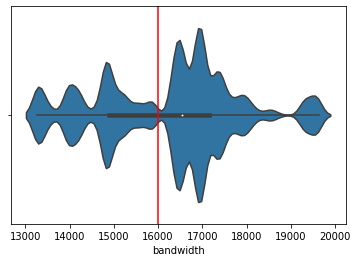

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(x=df.bandwidth.astype(int), orient="vertical")
plt.axvline(16000, c='red')
plt.show()